1 - Chargement

In [32]:
from google.colab import drive
import pandas as pd

drive.mount('/content/drive')
chemin_dossier = '/ProjetML/datasets/'
dataset = pd.read_csv("/content/drive/MyDrive"+chemin_dossier+"diabetes.csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [33]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


2 - Nettoyage et prétraitement

In [43]:
# Vérifier s'il y a des valeurs manquantes
print(dataset.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [45]:
from sklearn.preprocessing import StandardScaler
import numpy as np

# On remplace les zéros par NaN, puis impute par la médiane.
cols_zero = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
dataset[cols_zero] = dataset[cols_zero].replace(0, np.nan)
dataset[cols_zero] = dataset[cols_zero].fillna(dataset[cols_zero].median())

# Standardisation des mesures
scaler = StandardScaler()
dataset[cols_zero] = scaler.fit_transform(dataset[cols_zero])

print(dataset.head())


   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0            6  0.866045      -0.031990       0.670643 -0.181541  0.166619   
1            1 -1.205066      -0.528319      -0.012301 -0.181541 -0.852200   
2            8  2.016662      -0.693761      -0.012301 -0.181541 -1.332500   
3            1 -1.073567      -0.528319      -0.695245 -0.540642 -0.633881   
4            0  0.504422      -2.679076       0.670643  0.316566  1.549303   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


3 - EDA et déséquilibre

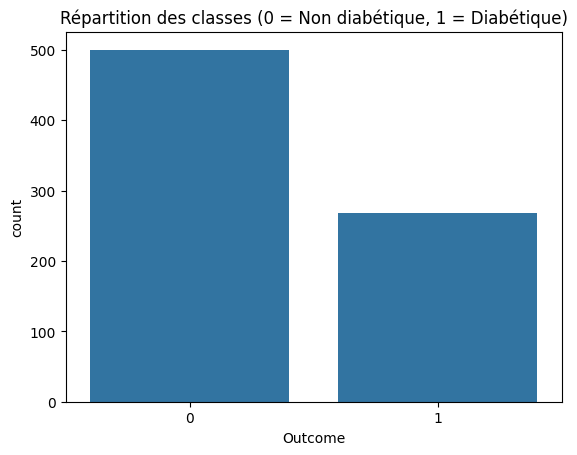


Statistiques pour Outcome = 0


,count,mean,std,min,25%,50%,75%,max
Pregnancies,500.0,3.298000,3.017185,0.000000,1.000000,2.000000,5.000000,13.000000
Glucose,500.0,-0.360776,0.812244,-2.552931,-0.942068,-0.465383,0.109925,2.476909
BloodPressure,500.0,-0.121329,0.986816,-4.002619,-0.735122,-0.031990,0.464339,4.104082
SkinThickness,500.0,-0.157313,0.973533,-2.516429,-0.809069,-0.012301,0.215347,3.516242
Insulin,500.0,-0.149199,0.862391,-1.455769,-0.529058,-0.181541,-0.181541,6.988885
BMI,500.0,-0.228450,0.946647,-2.074783,-0.975914,-0.299127,0.414047,3.616050
DiabetesPedigreeFunction,500.0,0.429734,0.299085,0.078000,0.229750,0.336000,0.561750,2.329000
Age,500.0,31.190000,11.667655,21.000000,23.000000,27.000000,37.000000,81.000000
Outcome,500.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000



Statistiques pour Outcome = 1


,count,mean,std,min,25%,50%,75%,max
Pregnancies,268.0,4.865672,3.741239,0.000000,1.750000,4.000000,8.000000,17.000000
Glucose,268.0,0.673089,0.972069,-1.435189,-0.087324,0.603047,1.490665,2.542658
BloodPressure,268.0,0.226360,0.988660,-3.506291,-0.362876,0.133453,0.795225,3.442311
SkinThickness,268.0,0.293494,0.986056,-2.516429,-0.012301,-0.012301,0.784467,7.955377
Insulin,268.0,0.278356,1.169188,-1.467353,-0.181541,-0.181541,0.307878,8.170442
BMI,268.0,0.426212,0.959961,-1.390718,-0.226354,0.261224,0.919818,5.042397
DiabetesPedigreeFunction,268.0,0.550500,0.372354,0.088000,0.262500,0.449000,0.728000,2.420000
Age,268.0,37.067164,10.968254,21.000000,28.000000,36.000000,44.000000,70.000000
Outcome,268.0,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution de la cible
sns.countplot(x='Outcome', data=dataset)
plt.title('Répartition des classes (0 = Non diabétique, 1 = Diabétique)')
plt.show()

# Statistiques descriptives par classe
for cls in [0,1]:
    print(f"\nStatistiques pour Outcome = {cls}")
    display(dataset[dataset['Outcome']==cls].describe().T)
